# Neural Network Classifier




**Linear Model**

$f(x) = w^Tx + b$

Where,
$x$ : input

$w^T$: weight

$b$ : bias

**Activation Function**

Unit step function

$ g(z)=
\begin{dcases}
    1, & \text{if } z \ge \theta \\
    0, & \text{otherwise}
\end{dcases}
$

**Approximation**

For the liniear model class can be predicted as follows

$ \hat{y} = g(f(x)) = g(w^Tx+b)$

**Perceptron Update Rule**

Identify the error and update the weight and bias

Learning rate: $\alpha$

For each training sample $x_i$:

$w = w + \Delta{w}$


$b = b + \Delta{b}$

$\Delta{w} = \alpha . (y_i - \hat{y}).x_i$

$\Delta{b} = \alpha . (y_i - \hat{y})$

Using this the weights are pushed towards positive or negative target class in case of misclassificaiton

| **$y$**    | **$\hat{y}$** | **$y-\hat{y}$** |
| ------ | ------- | ---- |
| 1 | 1  | 0 |
| 1 | 0  | 1 |
| 0 | 0  | 0 |
| 0 | 1  | -1 |



### Implementation Idea

**Training**
- Initialize weight and bias
- For each training sample
  - Calculate $ \hat{y} = g(f(x)) = g(w^Tx+b)$
  - Apply update rule:
    
    $\Delta{w} = \alpha . (y_i - \hat{y}).x_i$
    
    $\Delta{b} = \alpha . (y_i - \hat{y})$

**Prediction**
- Calculate :
  
  $ \hat{y} = g(f(x)) = g(w^Tx+b)$



### Implementation

In [24]:
import numpy as np

In [25]:
class PerceptronClassifier:

    def __init__(self, lr, n_iters):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        _y = np.array([1 if i > 0 else 0 for i in y])
        #(axis=0)
        for n_iter in range(self.n_iters):
            # early stopping cond here
            # TODO

            # print(f"n_iter = {n_iter}")
            for idx, x_i in enumerate(X):
                # print(f"enumerate(X)  idx = {idx}, x_i = {x_i}")
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                # Perceptron update rule
                # Delta calculation
                update = self.lr * (_y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X): # X : test data
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


    def activation_func(self, x):
        # unit step function
        return np.where(x >= 0, 1, 0)

In [26]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [27]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn import datasets


X, y = datasets.make_blobs(
    n_samples=1500,
    n_features=2,
    centers=2,
    cluster_std=1.05,
    random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [28]:
p = PerceptronClassifier(lr=0.01, n_iters=100)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


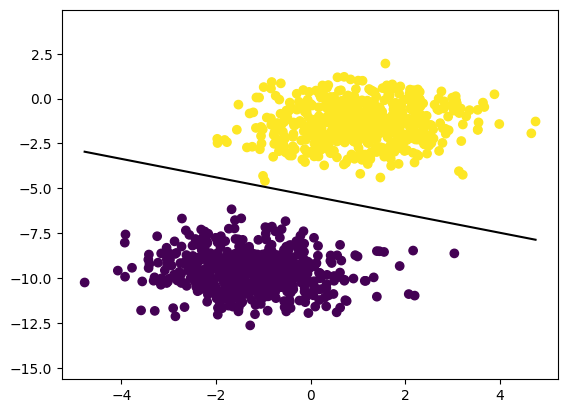

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

In [30]:
p.weights

array([0.02471583, 0.04802132])

### Work on own dataset

In [31]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("diabetes.csv")
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [32]:
# normalize the dataset and try to evaluate again
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X)
X = ss.transform(X)

In [33]:
ss.inverse_transform(X)[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [34]:
X[0]

array([ 0.45869432,  0.89656476,  0.15533439,  0.97939656, -0.58694243,
        0.29135643,  0.41664261,  1.46505177])

In [35]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                    test_size = 0.2,
                                    random_state=1)

In [36]:
p = PerceptronClassifier(lr=0.002, n_iters=10)
p.fit(x_train, y_train)
predictions = p.predict(x_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))


Perceptron classification accuracy 0.6818181818181818


For more detailed implementation

https://github.com/Worm4047/IntroToNeuralNetworks/blob/main/main.ipynb
